In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import cos
from numpy import sin
from numpy import exp
from numpy import pi
from numpy import sqrt
from numpy import absolute
from numpy import e

class Particle:
    def __init__(self, xi, yi, f):
        self.xi = xi
        self.yi = yi
        self.f = f


def fxy(x,y):
  return (1-x)**2+100*(y-x**2)**2
    #return 0.26*(x**2+y**2)-0.48*(x*y) # Функция Мартьяса f(0,0)=0  диапозон -10<=x,y<=10
    #2*x**2-1.05*x**4+x**6/6+x*y+y**2 #Функция трехгорбого верблюда f(0,0)=0  диапозон -5<=x,y<=5
    #-absolute(sin(x) * cos(y) * exp(absolute(1 - (sqrt(x**2 + y**2)/pi)))) # Функция Хольдерга диапозон -10<=x,y<=10  f(8.061288,-9.662289)=-19.208065
    #-20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20 #Функция Экли f(0,0)=0  диапозон -5<=x,y<=5
    #(x**2 + y - 11)**2 + (x + y**2 -7)**2 #Функция Химмельбау f(3.58,-1.8)=0  диапозон -5<=x,y<=5
    #-cos(x) * cos(y) * exp(-((x - pi)**2 + (y - pi)**2)) #Функция Изома f(pi,pi)=0  диапозон -100<=x,y<=100
    #0.26*(x**2+y**2)-0.48*(x*y) # Функция Мартьяса f(0,0)=0  диапозон -10<=x,y<=10
    #(x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2 Функция Бута f(1,3)=0  диапозон -10<=x,y<=10

def grad(x, y):
  dx=2*x-2+100*(-4*y*x+4*x**3)
  dy=100*(2*y-2*x**2)
  return (dx, dy)

pieces = 1600
maxV = 10
minV = -10
step = (maxV - minV) / (pieces - 1)
particles = []
bestX = 0
bestY = 0
fBest = 0

plt.ion()   # включение интерактивного режима отображения графиков
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# размечаем границы осей для аргументов
xval = np.linspace(minV, maxV, 100)
yval = np.linspace(minV, maxV, 100)
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y
z = fxy(x, y)
ax.plot_surface(x, y, z, color='y', alpha=0.5)
# point = ax.scatter(x1[0], x2[0], f(x1[0], x2[0]), c='red')


for i in range(pieces):
    for j in range(pieces):
        xi = minV + step * i
        yi = minV + step * j
        f = fxy(xi, yi)

        if i == 0 and j == 0:
            bestX = xi
            bestY = yi
            fBest = fxy(bestX, bestY)

        if fxy(xi, yi) < fxy(bestX, bestY):
            bestX = xi
            bestY = yi
            fBest = fxy(bestX, bestY)

        particles.append(Particle(xi, yi, f))


point = ax.scatter(bestX, bestY, fBest, c='red')

print('X: %.6f' % bestX)
print('Y: %.6f' % bestY)
print('f: %.6f' % fBest)

#plt.ioff()   # выключение интерактивного режима отображения графиков
plt.show()


<IPython.core.display.Javascript object>

X: -0.006254
Y: -0.006254
f: 0.000002


<IPython.core.display.Javascript object>

Неизвестные:  -0.0 -0.0
Оптимальное решение:  0.0


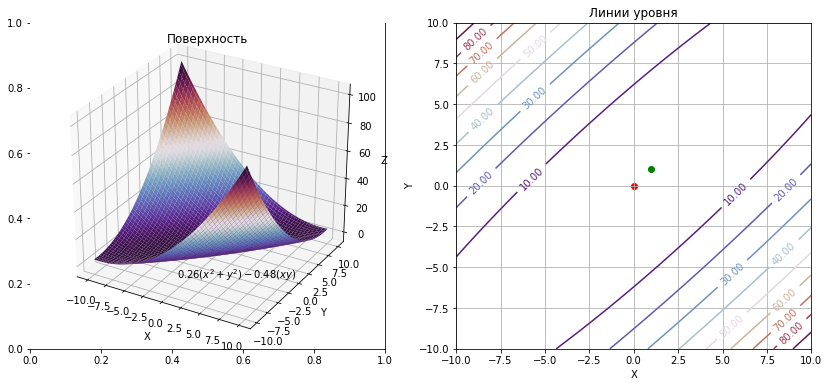

0.52*x - 0.48*y
-0.48*x + 0.52*y
iter=240; x=(0.00, 0.00); f(x)=0.00; grad f(x)=(0.00,0.00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [ ]:
1.
#Функция Мартьяса:
#$$f(x,y)=0.26(x^2+y^2)-0.48(xy)$$

2.
start=(1,1)

3.
def f(x,y):
    return 0.26*(x**2+y**2)-0.48*(x*y) # Функция Мартьяса f(0,0)=0  диапозон -10<=x,y<=10

from scipy import optimize

op=optimize.minimize(lambda x: f(*x), x0=start)

X=[round(x,2) for x in op['x']]

point_best=[X[0], X[1], round(op['fun'],2)]

print('Неизвестные: ', point_best[0],point_best[1])
print('Оптимальное решение: ', point_best[2])

4.
import numpy as np

def make_data():
    x=np.linspace(-10,10,100)
    y=np.linspace(-10,10,100)

    X,Y=np.meshgrid(x,y)
    Z=0.26*(X**2+Y**2)-0.48*(X*Y)
    return X,Y,Z

5.
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x,y,z=make_data()
fig,ax=plt.subplots(1,2,figsize=(14,6))

ax[0]= fig.add_subplot(1,2,1,projection='3d')
ax[0].plot_surface(x,y,z,
                  rstride=2,
                  cstride=2,
                  cmap='twilight_shifted'
                  )

ax[0].text(0,-8,0,r'$0.26(x^2+y^2)-0.48(xy)$')
ax[0].set(xlabel='X',ylabel='Y',zlabel='Z',title='Поверхность')
ax[0].scatter(point_best[0],point_best[1],f(point_best[0],point_best[1]),marker='*',color='red')

contour=ax[1].contour(x,y,z,levels=10,cmap='twilight_shifted')
ax[1].clabel(contour, fontsize=10,fmt='%.2f')
ax[1].set(xlabel='X',ylabel='Y',title='Линии уровня')
ax[1].scatter(point_best[0],point_best[1],color='red')
ax[1].scatter(start[0],start[1],color='green')
ax[1].grid()

plt.show();

6.
import sympy as sm

x,y=sm.symbols('x y')
f=0.26*(x**2+y**2)-0.48*(x*y)

print(sm.diff(f,x))
print(sm.diff(f,y))

7.
from math import sin,cos,exp

def f(x,y):
    return 0.26*(x**2+y**2)-0.48*(x*y) # Функция Мартьяса f(0,0)=0  диапозон -10<=x,y<=10

def grad(x,y):
    dx=0.52*x - 0.48*y
    dy=-0.48*x + 0.52*y
    return (dx,dy)


8.
#градиентный спуск
def dist(x1,x2):
    return (x1[0]-x2[0])**2+(x1[1]-x2[1])**2

x0=start
eta=0.6
x_cur=x0

points=[x0]
vals=[]
coords=[]
i=0
while True:
    x_new=(x_cur[0]-eta*grad(*x_cur)[0],
          x_cur[1]-eta*grad(*x_cur)[1])
    points.append(x_new)
    if dist(x_new,x_cur)<1e-8:
        count_it=i
        break
    x_cur=x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i+=1
print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
      f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f},{grad(*x_cur)[1]:.2f})")


9.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

%matplotlib notebook


fig,ax=plt.subplots(1,2,figsize=(14,6))
text=fig.text(0,1,"Frame: ",va='top')

ax[0]= fig.add_subplot(1,2,1,projection='3d')
ax[1]= fig.add_subplot(1,2,2)

graph_rigth,=ax[1].plot([],[],'ro')

def init():
    x,y,z=make_data()

    ax[0].plot_surface(x,y,z,
                  rstride=2,
                  cstride=2,
                  cmap='twilight_shifted'
		  ,alpha=0.5
                  )

    ax[0].scatter(start[0],start[1],f(start[0], start[1]),marker='*',color='green')
    ax[0].set(xlabel='X',ylabel='Y',zlabel='Z',title='$f(x,y)=0.26(x^2+y^2)-0.48(xy)$')
    #рисуем линии уровня
    ax[1].scatter(start[0],start[1],color='green',marker='*')
    contour=ax[1].contour(x,y,z,levels=10,cmap='twilight_shifted')
    ax[1].clabel(contour, fontsize=10,fmt='%.2f')
    ax[1].set(xlabel='X',ylabel='Y',title='Линии уровня')
    ax[1].grid()

def update(i):
    if i%50==0:
        text.set_text("Frame: %d,%.2f,%.2f,%.2f" 
                      % (i,points[i][0],points[i][1], vals[i]))
        graph_rigth.set_data(points[i][0],points[i][1])
        ax[0].scatter(points[i][0],points[i][1], vals[i],color='red')
        return graph_rigth
    
anim= FuncAnimation(fig,
                    update,
                    frames=count_it,
                   interval=1,
                   init_func=init
                   )
    

    
plt.show();

Неизвестные:  1.0 3.0
Оптимальное решение:  0.0


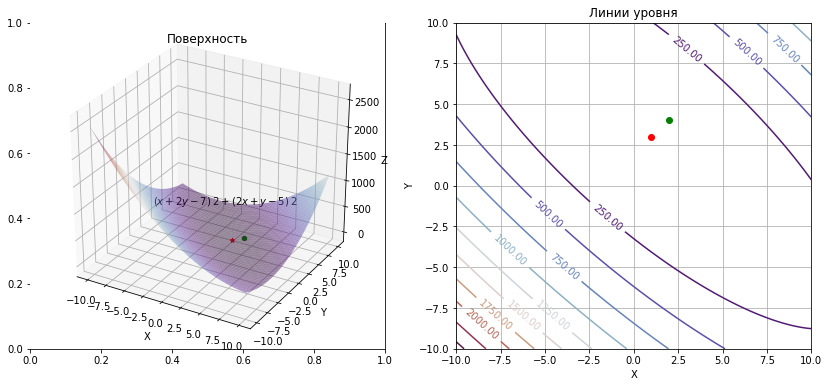

10*x + 8*y - 34
8*x + 10*y - 38
iter=559; x=(1.00, 3.00); f(x)=0.00; grad f(x)=(0.00,0.00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [ ]:
#Функция Бута:
#$$f(x,y)=(x + 2y - 7) ^ 2 + (2x + y - 5) ^ 2$$

1.
start=(2,4)

2.
def f(x,y):
    return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2 #Функция Бута f(1,3)=0  диапозон -10<=x,y<=10

3.
from scipy import optimize

op=optimize.minimize(lambda x: f(*x), x0=start)

X=[round(x,2) for x in op['x']]

point_best=[X[0], X[1], round(op['fun'],2)]

print('Неизвестные: ', point_best[0],point_best[1])
print('Оптимальное решение: ', point_best[2])


4.
import numpy as np

def make_data():
    x=np.linspace(-10,10,100)
    y=np.linspace(-10,10,100)

    X,Y=np.meshgrid(x,y)
    Z=(X + 2 * Y - 7) ** 2 + (2 * X + Y - 5) ** 2
    return X,Y,Z

5.
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x,y,z=make_data()
fig,ax=plt.subplots(1,2,figsize=(14,6))

ax[0]= fig.add_subplot(1,2,1,projection='3d')
ax[0].plot_surface(x,y,z,
                  rstride=2,
                  cstride=2,
                  cmap='twilight_shifted'
                   ,alpha=0.5
                  )

ax[0].text(-5,-5,1000,r'$(x + 2y - 7) ^ 2 + (2x + y - 5) ^ 2$')
ax[0].set(xlabel='X',ylabel='Y',zlabel='Z',title='Поверхность')

ax[0].scatter(point_best[0],point_best[1],f(point_best[0],point_best[1]),marker='*',color='red')
ax[0].scatter(start[0],start[1],f(start[0],start[1]),color='green')


contour=ax[1].contour(x,y,z,levels=10,cmap='twilight_shifted')
ax[1].clabel(contour, fontsize=10,fmt='%.2f')
ax[1].set(xlabel='X',ylabel='Y',title='Линии уровня')
ax[1].scatter(point_best[0],point_best[1],color='red')
ax[1].scatter(start[0],start[1],color='green')
ax[1].grid()

plt.show();

6.
import sympy as sm

x,y=sm.symbols('x y')
f=(x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

print(sm.diff(f,x))
print(sm.diff(f,y))

7.
from math import sin,cos,exp

def f(x,y):
    return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2 # Функция Бута

def grad(x,y):
    dx=10*x + 8*y - 34
    dy=8*x + 10*y - 38
    return (dx,dy)

8.
#градиентный спуск
def dist(x1,x2):
    return (x1[0]-x2[0])**2+(x1[1]-x2[1])**2

x0=start
eta= 1e-3
x_cur=x0

points=[x0]
vals=[]
coords=[]
i=0
while True:
    x_new=(x_cur[0]-eta*grad(*x_cur)[0],
          x_cur[1]-eta*grad(*x_cur)[1])
    points.append(x_new)
    if dist(x_new,x_cur)<1e-12:
        count_it=i
        break
    x_cur=x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i+=1
print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
      f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f},{grad(*x_cur)[1]:.2f})")


9.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

%matplotlib notebook


fig,ax=plt.subplots(1,2,figsize=(14,6))
text=fig.text(0,1,"Frame: ",va='top')

ax[0]= fig.add_subplot(1,2,1,projection='3d')
ax[1]= fig.add_subplot(1,2,2)

graph_rigth,=ax[1].plot([],[],'ro')

def init():
    x,y,z=make_data()

    ax[0].plot_surface(x,y,z,
                  rstride=2,
                  cstride=2,
                  cmap='twilight_shifted'
                    ,alpha=0.5
                  )

    ax[0].scatter(start[0],start[1],f(start[0], start[1]),marker='*',color='green')
    ax[0].set(xlabel='X',ylabel='Y',zlabel='Z',title='$f(x,y)=(x + 2y - 7) ^ 2 + (2x + y - 5) ^ 2$')
    #рисуем линии уровня
    ax[1].scatter(start[0],start[1],color='green',marker='*')
    contour=ax[1].contour(x,y,z,levels=10,cmap='twilight_shifted')
    ax[1].clabel(contour, fontsize=10,fmt='%.2f')
    ax[1].set(xlabel='X',ylabel='Y',title='Линии уровня')
    ax[1].grid()

def update(i):
    if i%50==0:
        text.set_text("Frame: %d,%.2f,%.2f,%.2f" 
                      % (i,points[i][0],points[i][1], vals[i]))
        graph_rigth.set_data(points[i][0],points[i][1])
        ax[0].scatter(points[i][0],points[i][1], vals[i],color='red')
        return graph_rigth
    
anim= FuncAnimation(fig,
                    update,
                    frames=count_it,
                   interval=1,
                   init_func=init
                   )
    

    
plt.show();


Неизвестные:  3.14 3.14
Оптимальное решение:  -1.0


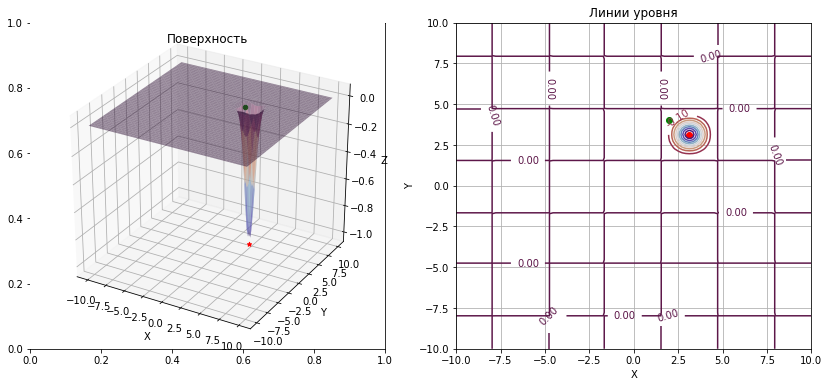

-(-2*x + 2*pi)*exp(-(x - pi)**2 - (y - pi)**2)*cos(x)*cos(y) + exp(-(x - pi)**2 - (y - pi)**2)*sin(x)*cos(y)
-(-2*y + 2*pi)*exp(-(x - pi)**2 - (y - pi)**2)*cos(x)*cos(y) + exp(-(x - pi)**2 - (y - pi)**2)*sin(y)*cos(x)
iter=384; x=(3.14, 3.14); f(x)=-1.00; grad f(x)=(-0.00,0.00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [ ]:
#Функция Изома:
#$$f(x,y)=-cos(x) cos(y) exp(-((x - pi)^2 + (y - pi)^2))$$

1.
start=(2,4)

2.
from math import sin,cos,exp,pi

def f(x,y):
    return -cos(x) * cos(y) * exp(-((x - pi)**2 + (y - pi)**2)) #Функция Изома f(pi,pi)=0  диапозон -100<=x,y<=100

3.
from scipy import optimize

op=optimize.minimize(lambda x: f(*x), x0=start)

X=[round(x,2) for x in op['x']]

point_best=[X[0], X[1], round(op['fun'],2)]

print('Неизвестные: ', point_best[0],point_best[1])
print('Оптимальное решение: ', point_best[2])


4.
from math import sin,cos,exp,pi
import numpy as np

def make_data():
    x=np.linspace(-10,10,100)
    y=np.linspace(-10,10,100)

    X,Y=np.meshgrid(x,y)
    

    Z= -np.cos(X) * np.cos(Y) * np.exp(-((X - np.pi)**2 + (Y - np.pi)**2)) 
    
    
    return X,Y,Z


5.
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x,y,z=make_data()
fig,ax=plt.subplots(1,2,figsize=(14,6))

ax[0]= fig.add_subplot(1,2,1,projection='3d')
ax[0].plot_surface(x,y,z,
                  rstride=2,
                  cstride=2,
                  cmap='twilight_shifted'
                   ,alpha=0.5
                  )

ax[0].text(-5,-5,1000,r'$-cos(x) cos(y) exp(-((x - pi)^2 + (y - pi)^2))$')
ax[0].set(xlabel='X',ylabel='Y',zlabel='Z',title='Поверхность')

ax[0].scatter(point_best[0],point_best[1],f(point_best[0],point_best[1]),marker='*',color='red')
ax[0].scatter(start[0],start[1],f(start[0],start[1]),color='green')


contour=ax[1].contour(x,y,z,levels=10,cmap='twilight_shifted')
ax[1].clabel(contour, fontsize=10,fmt='%.2f')
ax[1].set(xlabel='X',ylabel='Y',title='Линии уровня')
ax[1].scatter(point_best[0],point_best[1],color='red')
ax[1].scatter(start[0],start[1],color='green')
ax[1].grid()

plt.show();

6.
import sympy as sm

x,y=sm.symbols('x y')
f=-sm.cos(x) * sm.cos(y) * sm.exp(-((x - sm.pi)**2 + (y - sm.pi)**2)) 

print(sm.diff(f,x))
print(sm.diff(f,y))

7.
from math import sin,cos,exp,pi

def f(x,y):
    return -cos(x) * cos(y) * exp(-((x - pi)**2 + (y - pi)**2)) #Функция Изома

def grad(x,y):
    dx=-(-2*x + 2*pi)*exp(-(x - pi)**2 - (y - pi)**2)*cos(x)*cos(y) + exp(-(x - pi)**2 - (y - pi)**2)*sin(x)*cos(y)
    dy=-(-2*y + 2*pi)*exp(-(x - pi)**2 - (y - pi)**2)*cos(x)*cos(y) + exp(-(x - pi)**2 - (y - pi)**2)*sin(y)*cos(x)
    return (dx,dy)

8.
#градиентный спуск
def dist(x1,x2):
    return (x1[0]-x2[0])**2+(x1[1]-x2[1])**2

x0=start
eta= 1e-2
x_cur=x0

points=[x0]
vals=[]
coords=[]
i=0
while True:
    x_new=(x_cur[0]-eta*grad(*x_cur)[0],
          x_cur[1]-eta*grad(*x_cur)[1])
    points.append(x_new)
    if dist(x_new,x_cur)<1e-9:
        count_it=i
        break
    x_cur=x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i+=1
print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
      f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f},{grad(*x_cur)[1]:.2f})")

9.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

%matplotlib notebook


fig,ax=plt.subplots(1,2,figsize=(14,6))
text=fig.text(0,1,"Frame: ",va='top')

ax[0]= fig.add_subplot(1,2,1,projection='3d')
ax[1]= fig.add_subplot(1,2,2)

graph_rigth,=ax[1].plot([],[],'ro')

def init():
    x,y,z=make_data()

    ax[0].plot_surface(x,y,z,
                  rstride=2,
                  cstride=2,
                  cmap='twilight_shifted'
                    ,alpha=0.5
                  )

    ax[0].scatter(start[0],start[1],f(start[0], start[1]),marker='*',color='green')
    ax[0].set(xlabel='X',ylabel='Y',zlabel='Z',title='$f(x,y)=(x + 2y - 7) ^ 2 + (2x + y - 5) ^ 2$')
    #рисуем линии уровня
    ax[1].scatter(start[0],start[1],color='green',marker='*')
    contour=ax[1].contour(x,y,z,levels=10,cmap='twilight_shifted')
    ax[1].clabel(contour, fontsize=10,fmt='%.2f')
    ax[1].set(xlabel='X',ylabel='Y',title='Линии уровня')
    ax[1].grid()

def update(i):
    if i%50==0:
        text.set_text("Frame: %d,%.2f,%.2f,%.2f" 
                      % (i,points[i][0],points[i][1], vals[i]))
        graph_rigth.set_data(points[i][0],points[i][1])
        ax[0].scatter(points[i][0],points[i][1], vals[i],color='red')
        return graph_rigth
    
anim= FuncAnimation(fig,
                    update,
                    frames=count_it,
                   interval=1,
                   init_func=init
                   )
    

    
plt.show();


Неизвестные:  0.0 -0.0
Оптимальное решение:  0.0


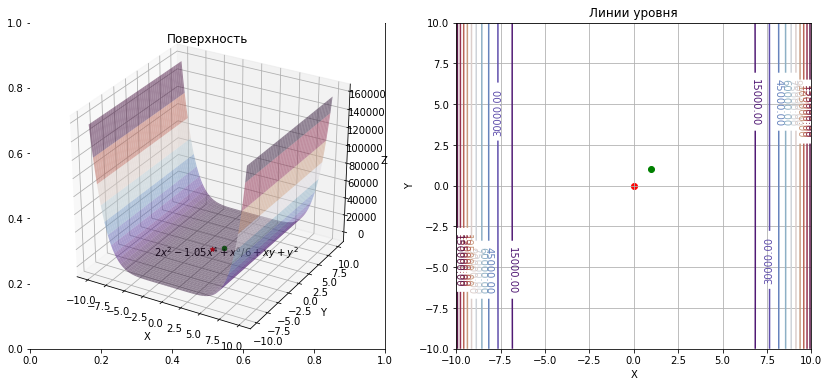

x**5 - 4.2*x**3 + 4*x + y
x + 2*y
iter=319; x=(-0.00, 0.00); f(x)=0.00; grad f(x)=(-0.00,0.00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [ ]:
#Функция Трехгорбого верблюда:
#$$f(x,y)=2x^2-1.05x^4+x^6/6+xy+y^2$$

1.
start=(1,1)

2.
def f(x,y):
    return 2*x**2-1.05*x**4+x**6/6+x*y+y**2 #Функция трехгорбого верблюда f(0,0)=0  диапозон -5<=x,y<=5

3.
from scipy import optimize

op=optimize.minimize(lambda x: f(*x), x0=start)

X=[round(x,2) for x in op['x']]

point_best=[X[0], X[1], round(op['fun'],2)]

print('Неизвестные: ', point_best[0],point_best[1])
print('Оптимальное решение: ', point_best[2])

4.
from math import sin,cos,exp,pi
import numpy as np

def make_data():
    x=np.linspace(-10,10,100)
    y=np.linspace(-10,10,100)

    X,Y=np.meshgrid(x,y)
    

    Z= 2*X**2-1.05*X**4+X**6/6+X*Y+Y**2 
    
    
    return X,Y,Z

5.
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x,y,z=make_data()
fig,ax=plt.subplots(1,2,figsize=(14,6))

ax[0]= fig.add_subplot(1,2,1,projection='3d')
ax[0].plot_surface(x,y,z,
                  rstride=2,
                  cstride=2,
                  cmap='twilight_shifted'
                   ,alpha=0.5
                  )

ax[0].text(-5,-5,1000,r'$2x^2-1.05x^4+x^6/6+xy+y^2$')
ax[0].set(xlabel='X',ylabel='Y',zlabel='Z',title='Поверхность')

ax[0].scatter(point_best[0],point_best[1],f(point_best[0],point_best[1]),marker='*',color='red')
ax[0].scatter(start[0],start[1],f(start[0],start[1]),color='green')


contour=ax[1].contour(x,y,z,levels=10,cmap='twilight_shifted')
ax[1].clabel(contour, fontsize=10,fmt='%.2f')
ax[1].set(xlabel='X',ylabel='Y',title='Линии уровня')
ax[1].scatter(point_best[0],point_best[1],color='red')
ax[1].scatter(start[0],start[1],color='green')
ax[1].grid()

plt.show();

6.
import sympy as sm

x,y=sm.symbols('x y')
f=2*x**2-1.05*x**4+x**6/6+x*y+y**2 

print(sm.diff(f,x))
print(sm.diff(f,y))

7.
from math import sin,cos,exp,pi

def f(x,y):
    return 2*x**2-1.05*x**4+x**6/6+x*y+y**2 #Функция трехгорбого верблюда

def grad(x,y):
    dx=x**5 - 4.2*x**3 + 4*x + y
    dy=x + 2*y
    return (dx,dy)

8.
#градиентный спуск
def dist(x1,x2):
    return (x1[0]-x2[0])**2+(x1[1]-x2[1])**2

x0=start
eta= 1e-2
x_cur=x0

points=[x0]
vals=[]
coords=[]
i=0
while True:
    x_new=(x_cur[0]-eta*grad(*x_cur)[0],
          x_cur[1]-eta*grad(*x_cur)[1])
    points.append(x_new)
    if dist(x_new,x_cur)<1e-9:
        count_it=i
        break
    x_cur=x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i+=1
print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
      f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f},{grad(*x_cur)[1]:.2f})")

9.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

%matplotlib notebook


fig,ax=plt.subplots(1,2,figsize=(14,6))
text=fig.text(0,1,"Frame: ",va='top')

ax[0]= fig.add_subplot(1,2,1,projection='3d')
ax[1]= fig.add_subplot(1,2,2)

graph_rigth,=ax[1].plot([],[],'ro')

def init():
    x,y,z=make_data()

    ax[0].plot_surface(x,y,z,
                  rstride=2,
                  cstride=2,
                  cmap='twilight_shifted'
                    ,alpha=0.5
                  )

    ax[0].scatter(start[0],start[1],f(start[0], start[1]),marker='*',color='green')
    ax[0].set(xlabel='X',ylabel='Y',zlabel='Z',title='$f(x,y)=2x^2-1.05x^4+x^6/6+xy+y^2$')
    #рисуем линии уровня
    ax[1].scatter(start[0],start[1],color='green',marker='*')
    contour=ax[1].contour(x,y,z,levels=10,cmap='twilight_shifted')
    ax[1].clabel(contour, fontsize=10,fmt='%.2f')
    ax[1].set(xlabel='X',ylabel='Y',title='Линии уровня')
    ax[1].grid()

def update(i):
    if i%50==0:
        text.set_text("Frame: %d,%.2f,%.2f,%.2f" 
                      % (i,points[i][0],points[i][1], vals[i]))
        graph_rigth.set_data(points[i][0],points[i][1])
        ax[0].scatter(points[i][0],points[i][1], vals[i],color='red')
        return graph_rigth
    
anim= FuncAnimation(fig,
                    update,
                    frames=count_it,
                   interval=1,
                   init_func=init
                   )
    

    
plt.show();


Неизвестные:  3.0 2.0
Оптимальное решение:  0.0


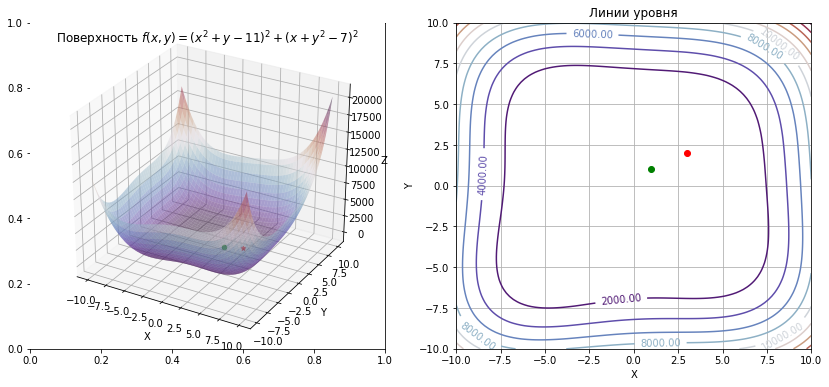

4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14
2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22
iter=304; x=(3.00, 2.00); f(x)=0.00; grad f(x)=(-0.00,0.00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [ ]:
#Функция Химмельблау:
#$$f(x,y)=(x^2 + y - 11)^2 + (x + y^2 -7)^2$$

1.
start=(1,1)

2.
def f(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2 #Функция Химмельбау f(3.58,-1.8)=0  диапозон -5<=x,y<=5


3.
from scipy import optimize

op=optimize.minimize(lambda x: f(*x), x0=start)

X=[round(x,2) for x in op['x']]

point_best=[X[0], X[1], round(op['fun'],2)]

print('Неизвестные: ', point_best[0],point_best[1])
print('Оптимальное решение: ', point_best[2])

4.
from math import sin,cos,exp,pi
import numpy as np

def make_data():
    x=np.linspace(-10,10,100)
    y=np.linspace(-10,10,100)

    X,Y=np.meshgrid(x,y)
    

    Z= (X**2 + Y - 11)**2 + (X + Y**2 -7)**2
    
    
    return X,Y,Z

5.
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x,y,z=make_data()
fig,ax=plt.subplots(1,2,figsize=(14,6))

ax[0]= fig.add_subplot(1,2,1,projection='3d')
ax[0].plot_surface(x,y,z,
                  rstride=2,
                  cstride=2,
                  cmap='twilight_shifted'
                   ,alpha=0.5
                  )

#ax[0].text(-5,-5,1000,r'$(x^2 + y - 11)^2 + (x + y^2 -7)^2$')
ax[0].set(xlabel='X',ylabel='Y',zlabel='Z',title='Поверхность $f(x,y)=(x^2 + y - 11)^2 + (x + y^2 -7)^2$')
 

ax[0].scatter(point_best[0],point_best[1],f(point_best[0],point_best[1]),marker='*',color='red')
ax[0].scatter(start[0],start[1],f(start[0],start[1]),color='green')


contour=ax[1].contour(x,y,z,levels=10,cmap='twilight_shifted')
ax[1].clabel(contour, fontsize=10,fmt='%.2f')
ax[1].set(xlabel='X',ylabel='Y',title='Линии уровня')
ax[1].scatter(point_best[0],point_best[1],color='red')
ax[1].scatter(start[0],start[1],color='green')
ax[1].grid()

plt.show();



6.
import sympy as sm

x,y=sm.symbols('x y')
f=(x**2 + y - 11)**2 + (x + y**2 -7)**2  

print(sm.diff(f,x))
print(sm.diff(f,y))

7.
from math import sin,cos,exp,pi

def f(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2 # Химмельблау
def grad(x,y):
    dx=4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14
    dy=2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22
    return (dx,dy)


8.
#градиентный спуск
def dist(x1,x2):
    return (x1[0]-x2[0])**2+(x1[1]-x2[1])**2

x0=start
eta= 1e-3
x_cur=x0

points=[x0]
vals=[]
coords=[]
i=0
while True:
    x_new=(x_cur[0]-eta*grad(*x_cur)[0],
          x_cur[1]-eta*grad(*x_cur)[1])
    points.append(x_new)
    if dist(x_new,x_cur)<1e-11:
        count_it=i
        break
    x_cur=x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i+=1
print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
      f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f},{grad(*x_cur)[1]:.2f})")

9.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

%matplotlib notebook


fig,ax=plt.subplots(1,2,figsize=(14,6))
text=fig.text(0,1,"Frame: ",va='top')

ax[0]= fig.add_subplot(1,2,1,projection='3d')
ax[1]= fig.add_subplot(1,2,2)

graph_rigth,=ax[1].plot([],[],'ro')

def init():
    x,y,z=make_data()

    ax[0].plot_surface(x,y,z,
                  rstride=2,
                  cstride=2,
                  cmap='twilight_shifted'
                    ,alpha=0.5
                  )

    ax[0].scatter(start[0],start[1],f(start[0], start[1]),marker='*',color='green')
    ax[0].set(xlabel='X',ylabel='Y',zlabel='Z',title='$f(x,y)=(x^2 + y - 11)^2 + (x + y^2 -7)^2$')
    #рисуем линии уровня
    ax[1].scatter(start[0],start[1],color='green',marker='*')
    contour=ax[1].contour(x,y,z,levels=10,cmap='twilight_shifted')
    ax[1].clabel(contour, fontsize=10,fmt='%.2f')
    ax[1].set(xlabel='X',ylabel='Y',title='Линии уровня')
    ax[1].grid()

def update(i):
    if i%50==0:
        text.set_text("Frame: %d,%.2f,%.2f,%.2f" 
                      % (i,points[i][0],points[i][1], vals[i]))
        graph_rigth.set_data(points[i][0],points[i][1])
        ax[0].scatter(points[i][0],points[i][1], vals[i],color='red')
        return graph_rigth
    
anim= FuncAnimation(fig,
                    update,
                    frames=count_it,
                   interval=1,
                   init_func=init
                   )
    

    
plt.show();


Выходные данные были обрезаны до нескольких последних строк (5000).
iter=528; x=(0.54, 0.29);f(x)=0.21; grad f(x)=(-0.42, -0.46)
iter=529; x=(0.54, 0.29);f(x)=0.21; grad f(x)=(-0.42, -0.46)
iter=530; x=(0.54, 0.29);f(x)=0.21; grad f(x)=(-0.42, -0.46)
iter=531; x=(0.54, 0.29);f(x)=0.21; grad f(x)=(-0.42, -0.46)
iter=532; x=(0.54, 0.29);f(x)=0.21; grad f(x)=(-0.42, -0.46)
iter=533; x=(0.54, 0.29);f(x)=0.21; grad f(x)=(-0.42, -0.46)
iter=534; x=(0.54, 0.29);f(x)=0.21; grad f(x)=(-0.42, -0.46)
iter=535; x=(0.54, 0.29);f(x)=0.21; grad f(x)=(-0.42, -0.46)
iter=536; x=(0.54, 0.29);f(x)=0.21; grad f(x)=(-0.42, -0.46)
iter=537; x=(0.54, 0.29);f(x)=0.21; grad f(x)=(-0.42, -0.45)
iter=538; x=(0.55, 0.29);f(x)=0.21; grad f(x)=(-0.41, -0.45)
iter=539; x=(0.55, 0.30);f(x)=0.21; grad f(x)=(-0.41, -0.45)
iter=540; x=(0.55, 0.30);f(x)=0.21; grad f(x)=(-0.41, -0.45)
iter=541; x=(0.55, 0.30);f(x)=0.21; grad f(x)=(-0.41, -0.45)
iter=542; x=(0.55, 0.30);f(x)=0.21; grad f(x)=(-0.41, -0.45)
iter=543; x=(0.55

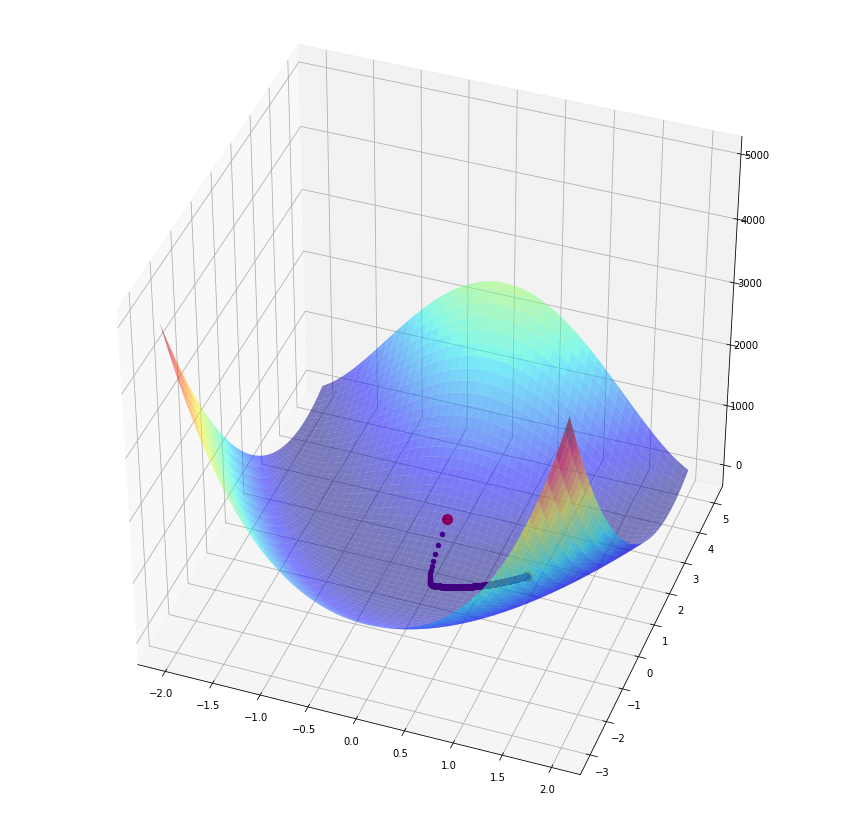

<function matplotlib.pyplot.show(*args, **kw)>

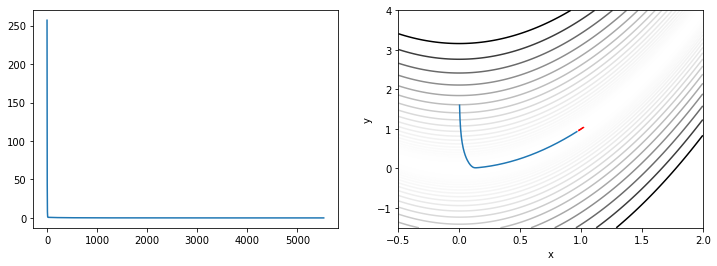

In [65]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def f(x,y):
  return (1-x)**2+100*(y-x**2)**2
    #return 0.26*(x**2+y**2)-0.48*(x*y) # Функция Мартьяса f(0,0)=0  диапозон -10<=x,y<=10
    #2*x**2-1.05*x**4+x**6/6+x*y+y**2 #Функция трехгорбого верблюда f(0,0)=0  диапозон -5<=x,y<=5
    #-absolute(sin(x) * cos(y) * exp(absolute(1 - (sqrt(x**2 + y**2)/pi)))) # Функция Хольдерга диапозон -10<=x,y<=10  f(8.061288,-9.662289)=-19.208065
    #-20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20 #Функция Экли f(0,0)=0  диапозон -5<=x,y<=5
    #(x**2 + y - 11)**2 + (x + y**2 -7)**2 #Функция Химмельбау f(3.58,-1.8)=0  диапозон -5<=x,y<=5
    #-cos(x) * cos(y) * exp(-((x - pi)**2 + (y - pi)**2)) #Функция Изома f(pi,pi)=0  диапозон -100<=x,y<=100
    #0.26*(x**2+y**2)-0.48*(x*y) # Функция Мартьяса f(0,0)=0  диапозон -10<=x,y<=10
    #(x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2 Функция Бута f(1,3)=0  диапозон -10<=x,y<=10

def grad(x, y):
  dx=2*x-2+100*(-4*y*x+4*x**3)
  dy=100*(2*y-2*x**2)
  return (dx, dy)

def dist(x1, x2):
  return (x1[0]-x2[0])**2+(x1[1]-x2[1])**2

x0=(0,2)
eta=1e-3
x_cur=x0

vals=[]
coords=[]
i=0
while True:
  x_new=(x_cur[0]-eta*grad(*x_cur)[0],
         x_cur[1]-eta*grad(*x_cur)[1])
  if dist(x_new, x_cur) <1e-9:
    break
  x_cur=x_new
  vals.append(f(*x_cur))
  coords.append(x_cur)
  i+=1
  print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
  f"f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

fig = plt.figure()

#Построение сетки и начальной и найденной лучшей точки
X=np.linspace(-2, 2, 100)
Y=np.linspace(-3, 5, 100)

x,y=np.meshgrid(X, Y)

axes = fig.add_subplot(projection='3d')
surf = axes.plot_surface(x, y, f(x, y), cmap='jet', alpha=0.5)
axes.clabel('x')
axes.clabel('y')
fig.set_size_inches(15, 15)
axes.view_init(40, -70) #настраиваем угол отображения графика
axes.scatter(coords[0][0],coords[0][1],vals[0], s=100, marker='o',color='red') #отображаю точку начала
#отображаю все последующие точки с меняющимся шагом (т.к. точкей очень много и чтобы часть из них пропускать); правила смены шага нужно задавать для каждой функции отдельно;
#данное правило подходит только для этой функции
step=1
for i in range(1, len(coords)-2, step):
  axes.scatter(coords[i][0],coords[i][1], vals[i], marker='o',color='purple')
  if i<100:
    step=1
  elif i<1000:
    step = 1000
  else:
    step=10000
axes.scatter(coords[len(coords)-1][0],coords[len(coords)-1][1],vals[len(vals)-1], s=100, marker='o',color='orange') #отображаю найденную лучшую точку 
plt.show();

#Построение двух графиков: зависимости от итерации и линий уровней
plt.subplots(1, 2, figsize=(12, 4)) # "1" - количество строк, "2" - количество колонок
  
plt.subplot(121) #то что график отрображаются в "1" строку, "2" колонки, "1" - этот график слева
plt.plot(vals)

plt.subplot(122) #то что график отрображаются в "1" строку, "2" колонки, "2" - этот график справа
n=100 #количество точек по оси x
m=100 ##количество точек по оси y
a=-0.5; b=2. #крайние точик на оси x
c=-1.5;d=4. #крайние точик на оси y 

X,Y=np.meshgrid(np.linspace(a,b,n), np.linspace(c,d,m))

Z=f(X,Y)

plt.xlim(a,b)
plt.ylim(c, d)
plt.xlabel('x')
plt.ylabel('y')

plt.contour(X, Y, Z, np.logspace(-0.5, 3 ,31), cmap='gray_r')
plt.plot([c[0] for c in coords], [c[1] for c in coords])

plt.scatter(1, 1, c='red')

plt.show